<a href="https://colab.research.google.com/github/ridvanyigit/All-Datasets/blob/main/Download_Dataset_from_Kaggle_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Download Dataset in Google Colab from Kaggle

## Download Dataset `with Kaggle API`

### Upload Kaggle API Key and Configure
- Create a `Kaggle Account`:

If you don't already have a Kaggle account, go to www.kaggle.com and create one.

- Create an `API Token`:

Log in to your Kaggle account, navigate to your profile, and find the "Account" tab. In the "API" section, click the "Create New API Token" button. This will download a file named `kaggle.json`. Store this file in a secure location.

When the file selection window opens, select the kaggle.json file you downloaded earlier.

Once the upload is complete, you should see the message "Kaggle API key successfully uploaded and configured." in the Colab output.

- Dataset: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle
!kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           6432         97  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          13050        232  1.0              
atharvasoundankar/global-energy-consumption-2000-2024                  Global Energy Consumption (2000-2024) 🔥⚡            252KB  2025-03-14 05:06:39           1235         30  1.0              
aniruddhawankhede/mental-

In [ ]:
import os
from google.colab import files

try:
    uploaded = files.upload()  # Open file upload dialog
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

    !mkdir -p ~/.kaggle  # Create Kaggle directory
    !cp kaggle.json ~/.kaggle/  # Move JSON file
    !chmod 600 ~/.kaggle/kaggle.json  # Set permissions
    print("Kaggle API key successfully uploaded and configured.")

except Exception as e:
    print(f"An error occurred while uploading or configuring the Kaggle API key: {e}")

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
Kaggle API key successfully uploaded and configured.


### Download and Extract the Dataset

In [ ]:
try:
    !kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset --force  # Download the dataset
    !unzip -o microsoft-catsvsdogs-dataset.zip  # Extract the dataset
    print("Dataset successfully downloaded and extracted.")

except Exception as e:
    print(f"An error occurred while downloading or extracting the dataset: {e}")

### Display Dataset Statistics

In [ ]:
import os

try:
    # Dataset directory path
    dataset_path = "PetImages"

    # Cat and dog directory paths
    cats_path = os.path.join(dataset_path, "Cat")
    dogs_path = os.path.join(dataset_path, "Dog")

    # Print the number of cat and dog images
    print("Number of cat images:", len(os.listdir(cats_path)))
    print("Number of dog images:", len(os.listdir(dogs_path)))

    # Print the names of the first few cat images
    print("\nFirst 5 cat images:\n")
    for i, filename in enumerate(os.listdir(cats_path)[:5]):
        print(filename)

    # Print the names of the first few dog images
    print("\nFirst 5 dog images:\n")
    for i, filename in enumerate(os.listdir(dogs_path)[:5]):
        print(filename)

except FileNotFoundError:
    print(f"Error: The '{dataset_path}' directory was not found. Ensure that the dataset has been extracted correctly.")

except Exception as e:
    print(f"An error occurred while displaying the dataset statistics: {e}")

Number of cat images: 12501
Number of dog images: 12501

First 5 cat images:

4685.jpg
9437.jpg
1864.jpg
408.jpg
7919.jpg

First 5 dog images:

4685.jpg
9437.jpg
1864.jpg
408.jpg
7919.jpg


### Convert Image Data to Pandas DataFrame

"The code might skip some corrupted or unrecognizable images. You can review Colab's output to see which images were skipped."

"After the DataFrame is successfully created, you'll see information in Colab's output showing the first few rows, its size, and the label distribution."

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Define the image directory
dataset_path = "PetImages"
cat_dir = os.path.join(dataset_path, "Cat")
dog_dir = os.path.join(dataset_path, "Dog")

# Image Dimensions (you can adjust these)
img_width, img_height = 128, 128  # Resize images for faster processing

# Function to load images and create DataFrame data
def create_dataframe_data(image_dir, label):
    data = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            try:
                img_path = os.path.join(image_dir, filename)
                img = Image.open(img_path).resize((img_width, img_height)).convert('RGB')  #Resize and convert to RGB
                img_array = np.array(img)
                data.append([img_array, label])
            except (FileNotFoundError, Image.UnidentifiedImageError) as e:
                print(f"Skipping {filename}: {e}") # Message for skipping
                continue # Go to the next file
            except Exception as e:
                print(f"Unexpected error processing {filename}: {e}")
                continue
    return data

# Create data lists for cats and dogs
cat_data = create_dataframe_data(cat_dir, "cat")
dog_data = create_dataframe_data(dog_dir, "dog")

# Combine the data
all_data = cat_data + dog_data

# Create the DataFrame
df = pd.DataFrame(all_data, columns=["image", "label"])

print(df.head())
print(df.shape)
print(df['label'].value_counts())

Skipping 666.jpg: cannot identify image file 'PetImages/Cat/666.jpg'
Skipping 11702.jpg: cannot identify image file 'PetImages/Dog/11702.jpg'


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


                                               image label
0  [[[49, 65, 98], [56, 72, 105], [58, 77, 109], ...   cat
1  [[[90, 68, 49], [52, 53, 64], [11, 39, 63], [5...   cat
2  [[[48, 55, 65], [50, 57, 67], [54, 61, 71], [5...   cat
3  [[[141, 3, 28], [142, 4, 29], [141, 3, 28], [1...   cat
4  [[[107, 104, 95], [108, 106, 96], [107, 107, 9...   cat
(24998, 2)
label
cat    12499
dog    12499
Name: count, dtype: int64


### Display the First Image

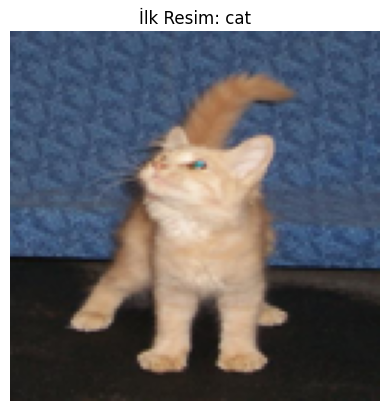

In [ ]:
import matplotlib.pyplot as plt

# Get the first image
first_image = df['image'][0]  # The first image NumPy array in the DataFrame

# Display the image
plt.imshow(first_image)
plt.title(f"First Image: {df['label'][0]}")  # Set the title with the label
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   24998 non-null  object
 1   label   24998 non-null  object
dtypes: object(2)
memory usage: 390.7+ KB
